## Fast.ai Deep Learning 1 Practice - Review Sentiment

This notebook is practice for Lesson 3 of the [Fast.ai](https://www.fast.ai) course. It uses the dataset by Andrew Maas et al. of IMDB reviews.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = Path('/path/to/Datasets/imdb/')

In [4]:
bs=24

In [5]:
data_lm = (TextList.from_folder(path)
          #Inputs: all the text files in path
          .filter_by_folder(include=['train', 'test', 'unsup'])
          # We may have other temp folders that contain text files so we only keep what's in train and test
          .split_by_rand_pct(0.1)
          # We randomly split and keep 10% (10,000 reviews) for validation
          .label_for_lm()
          # We want to do a language model so we label accordingly
          .databunch(bs=bs))

data_lm.save('data_lm.pkl')

In [6]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [21]:
data_lm.show_batch()

idx,text
0,", great \n \n dancing ! xxmaj it almost seems like a documentary of a time now past \n \n when hip - hop was a way of life . xxmaj it 's also interesting to see xxmaj new \n \n xxmaj york looking like ground zero from a nuclear attack . xxmaj some viewers \n \n may be too young to remember that xxmaj it"
1,"use of words . xxmaj and lastly , xxmaj mary mcdonell is brilliant as always . xxbos "" xxmaj written on the xxmaj wind "" is a xxmaj douglas xxmaj sirk 's melodrama . xxmaj douglas xxmaj sirk was rediscovered by the "" xxmaj cahiers du xxmaj cinema "" , xxmaj fassbinder etc .. that hailed him as a master director - i think that it is because of the"
2,"blind date . xxmaj unlike most romantic comedies , this little indie is mostly tongue - in - cheek situational comedy featuring xxmaj rogers and xxmaj sheedy with little emphasis on romance . a sort of road trip flick with many fun and some poignant moments keeps moving , stays fresh , and is a worthwhile watch for indie lovers . xxbos xxmaj enterprise , the latest high budget spin"
3,"into xxmaj show 's skull , then delivered a scissors kick that put both men through the table ! xxmaj booker crawled back into the ring and xxmaj big xxmaj show staggered in moments later . xxmaj show grabbed xxmaj booker 's throat but was met by a low blow and a kick to the face . xxmaj booker climbed the top rope and nailed a somersaulting leg drop to"
4,"let 's face it , kids do n't care too much about these things , so long as they are entertained . xxmaj and entertained , they will be . xxmaj with some impressive scenes which brilliantly mix live action and animation to great effect , and more genuine movie magic than a hundred xxmaj harry xxmaj potters , it would be hard not to enjoy this wonderful slice of"


In [23]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


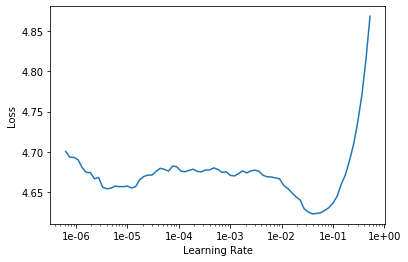

In [24]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [25]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.166533,4.025593,0.295612,22:24


In [26]:
learn.save('fit_head')

In [28]:
learn.load('fit_head');

In [29]:
learn.unfreeze()

In [30]:
# Train it for like 3.5 bloody hours
learn.fit_one_cycle(10, 1e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.820886,3.815918,0.317763,24:40
1,3.807087,3.777548,0.324828,24:38
2,3.810054,3.745248,0.329309,24:38
3,3.721129,3.710541,0.333424,24:38
4,3.657306,3.680089,0.336856,24:38
5,3.608120,3.653374,0.340088,24:38
6,3.541773,3.636021,0.342416,24:38
7,3.487179,3.624891,0.343953,24:37
8,3.404276,3.622058,0.344459,24:38
9,3.354934,3.623553,0.344374,24:38


In [31]:
learn.save('fine_tuned')

In [33]:
learn.load('fine_tuned');

In [34]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [35]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because it actually made me think about the future . So i enjoyed it . The acting was amazing . Although not a lot of coaching and dialogue was given . The story was good .
I liked this movie because of the fact that the director said he did n't like the movie because he did n't want to see it . i think it 's very similar to the Freddy Krueger movies ! It was n't


In [36]:
# Saving just the encoder from the model
learn.save_encoder('fine_tuned_enc')

In [7]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
            # grab all the text files in path
            .split_by_folder(valid='test')
            # split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
            .label_from_folder(classes=['neg', 'pos'])
            # label them all with their folders
            .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [8]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [40]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love",pos
"xxbos xxmaj the freedom of having your own xxmaj sea xxmaj going xxmaj power xxmaj boat , the excitement of going on underwater adventures a rugged , an 's man of an adventurer and xxunk so well endowed ! ) assistants in fine xxmaj bikinis were all definite selling points for "" xxup sea xxup xxunk - 61 ) . \n \n xxmaj just what was the reason for",pos
"xxbos xxmaj the vigilante has long held a fascination for audiences , inasmuch as it evokes a sense of swift , sure justice ; good triumphs over evil and the bad guy gets his deserts . xxmaj it is , in fact , one of the things that has made the character of xxmaj dirty xxmaj harry xxmaj callahan ( as played by xxmaj clint xxmaj eastwood ) so popular",pos
"xxbos xxmaj office work , especially in this era of computers , multi - functional copy machines , e - mail , voice mail , snail mail and ` temps , ' is territory ripe with satirical possibilities , a vein previously tapped in such films as ` xxmaj clockwatchers ' and ` xxmaj office xxmaj space , ' and very successfully . xxmaj this latest addition to the temp",neg


In [9]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc');

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


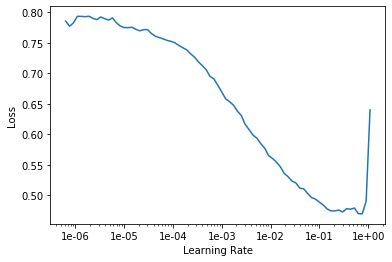

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.259178,0.180209,0.931400,02:51


In [45]:
learn.save('first')

In [46]:
learn.load('first');

In [47]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.230952,0.162648,0.938480,03:31


In [48]:
learn.save('second')

In [49]:
learn.load('second');

In [50]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4), 5e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.194210,0.141342,0.947400,04:44


In [51]:
learn.save('third')

In [13]:
learn.load('third');

In [18]:
learn.predict("I really loved that movie, it was awesome!")

(Category tensor(0), tensor(0), tensor([0.7424, 0.2576]))